# Global temperature changing trend and stablity

Xinyang Gao

Professor Khazra

ECO225

02-03-2023

## Introduction
Global warming is one problem that all human beings have concerned for several decades. We may heard from news coral die-offs are widespread in some areas, and record temperatures are being set in some places. Some people think global warming is just a conspiracy, the others over concerned that take many extreme actions.

In this project we will discuss and take a look with real data from Berkeley Earth. (n.d.). Climate Change: Earth Surface Temperature Data. Kaggle which record temperature for thousands cites and almost all the countries for last three centuries. These record the average temperature, average temperature uncertainty, time, location, and etc. We will see the how the global or some special location temperature change over time. Also we will use a way to measure how stable global and some places temperature over time.

## Data Cleaning
We will start by reading our data, performing data cleaning, and adding additional columns. Our first main focus will be on the temperature data of major cities, as they are more likely to have accurate and complete temperature records. 

### Major Cities Data
We will first read the major city data and have a look

In [133]:
import pandas as pd
import numpy as np

In [134]:
#Read data
file_path = "/Users/nick0o0o0/Library/Mobile Documents/com~apple~CloudDocs/gxyfile/third_year/ECO225/Project_One/archive/"

country_temp = pd.read_csv(file_path + "GlobalLandTemperaturesByCountry.csv")
major_city_temp = pd.read_csv(file_path + "GlobalLandTemperaturesByMajorCity.csv")

global_temp = pd.read_csv(file_path + "GlobalTemperatures.csv")

In [135]:
major_city_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


### New Columns: Year, Month, NumLatitude, and Hemisphere
Now we will do data cleaning to create number version of Latitude in column NumLatitude and one string indicate which hemisphere it is in Hemisphere. With these column we will easy to find cities has similar latitude and esay to campare their data. We compare these data since they should have similar temperature as they has similar latitude. Also we will create new column called Year and Month to track the year and month seperatly. These two column are number so it is easy for us to slicing later on.

In [136]:
for row in major_city_temp.iterrows():
    index_value, column_value = row
    
    lati = column_value["Latitude"]
    time = column_value["dt"]

    if "N" in lati:
        major_city_temp.at[index_value, "Hemisphere"] = "N"
        major_city_temp.at[index_value, "NumLatitude"] = float(lati.replace("N",""))
        
    else:
        major_city_temp.at[index_value, "Hemisphere"] = "S"
        major_city_temp.at[index_value, "NumLatitude"] = float(lati.replace("S",""))
    
    major_city_temp.at[index_value, "Year"] = int(time[0:4])
    major_city_temp.at[index_value, "Month"] = int(time[5:7])
    
   
major_city_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Hemisphere,NumLatitude,Year,Month
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849.0,1.0
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849.0,2.0
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849.0,3.0
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849.0,4.0
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849.0,5.0


### Change datatype to int for Year, Month, and RoundLati
Next we create a column called RoundLati which is the rounded latitude for that city since it may difficult to find several cities has the same and precise latitude in this data. We use rounded function to have a integer for the Latitude. Change the datatype for Year, Month, and RoundLati to integer.

In [137]:
major_city_temp["RoundLati"] = round(major_city_temp["NumLatitude"])
major_city_temp["Year"] = major_city_temp["Year"].astype(int)
major_city_temp["Month"] = major_city_temp["Month"].astype(int)
major_city_temp["RoundLati"] = major_city_temp["RoundLati"].astype(int)

major_city_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Hemisphere,NumLatitude,Year,Month,RoundLati
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849,1,6
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849,2,6
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849,3,6
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849,4,6
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,N,5.63,1849,5,6


### Groupby city and year
Next we use groupby method to get the average temperature and standard deviation over each year of each city in major city data. This is useful when we want to compare data over year.

In [142]:
major_copy = major_city_temp.copy()
MajorCity_year_average = major_copy.dropna(subset=["AverageTemperature"]).groupby(["City", "Year"]).mean()
MajorCity_year_average.rename(columns={"AverageTemperature": "AverageYearTemperature"})

AverageYearTemperature  AverageTemperatureUncertainty  \
City    Year                                                          
Abidjan 1849               25.582583                       1.388583   
        1850               25.518250                       1.503667   
        1851               25.672333                       1.443583   
        1856               26.277333                       1.352000   
        1857               25.169091                       1.283091   
...                              ...                            ...   
Xian    2009               12.528417                       0.337250   
        2010               12.589750                       0.304750   
        2011               12.075167                       0.390583   
        2012               11.898167                       0.717500   
        2013               14.460000                       0.828625   

              NumLatitude     Month  RoundLati  
City    Year                                    
Abidjan 1849         5.63  6.500000        6.0  
        1850         5.63  6.500000        6.0  
        1851         5.63  6.500000        6.0  
        1856         5.63  3.666667        6.0  
        1857         5.63  6.909091        6.0  
...                   ...       ...        ...  
Xian    2009        34.56  6.500000       35.0  
        2010        34.56  6.500000       35.0  
        2011        34.56  6.500000       35.0  
        2012        34.56  6.500000       35.0  
        2013        34.56  4.500000       35.0  

[19202 rows x 5 columns]

In [143]:
MajorCity_year_std = major_copy.dropna(subset=["AverageTemperature"]).groupby(["City", "Year"]).std()
MajorCity_year_std.rename(columns={"AverageTemperature": "AverageYearTemperatureStd"})

AverageYearTemperatureStd  AverageTemperatureUncertainty  \
City    Year                                                             
Abidjan 1849                   1.434284                       0.193051   
        1850                   1.398027                       0.320886   
        1851                   1.234958                       0.324207   
        1856                   1.177075                       0.253714   
        1857                   1.269211                       0.166744   
...                                 ...                            ...   
Xian    2009                   9.675455                       0.126396   
        2010                   9.336606                       0.123391   
        2011                   9.940693                       0.145482   
        2012                   9.985925                       0.506160   
        2013                  10.339130                       0.450394   

              NumLatitude     Month  RoundLati  
City    Year                                    
Abidjan 1849          0.0  3.605551        0.0  
        1850          0.0  3.605551        0.0  
        1851          0.0  3.605551        0.0  
        1856          0.0  2.160247        0.0  
        1857          0.0  3.477198        0.0  
...                   ...       ...        ...  
Xian    2009          0.0  3.605551        0.0  
        2010          0.0  3.605551        0.0  
        2011          0.0  3.605551        0.0  
        2012          0.0  3.605551        0.0  
        2013          0.0  2.449490        0.0  

[19202 rows x 5 columns]

### Cities with similar Latitude with Shanghai
Shanghai is my hometown that is city in China, so I choose it and get a list of City with same latitude with it. Now the NumLatitude and Hemisphere are useful. First let's find the latitude of Shanghai

In [155]:
Shanghai_lati = major_city_temp.set_index("City").loc["Shanghai",["RoundLati", "Hemisphere"]]
Shanghai_lati.head(1)

,RoundLati,Hemisphere
City,,
Shanghai,31,N


In [165]:
SameLati_Shanghai = major_city_temp.set_index(["RoundLati", "Hemisphere"]).loc[31, "N"]["City"]

/var/folders/km/vjt389x91b93k1_jy0g3jscc0000gn/T/ipykernel_1916/1390243631.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  SameLati_Shanghai = major_city_temp.set_index(["RoundLati", "Hemisphere"]).loc[31, "N"]["City"]


In [173]:
SameLati_Shanghai = list(set(SameLati_Shanghai))
SameLati_Shanghai

['Shanghai', 'Alexandria', 'Chengdu', 'Lahore', 'Nanjing', 'Faisalabad']

### Pivot Table of temperature
It's time to create a pivot table to track the temperature of all the city with similar latitude with Shanghai over time

In [169]:
NoIndex_majorAvg = Major_year_average.reset_index()
YearTempPivotTable = NoIndex_majorAvg.pivot_table(values="AverageTemperature", index="Year", columns="City")
YearTempPivotTable.dropna()

City,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
Year,,,,,,,,,,,,,,,,,,,,,
1891,25.109083,17.182167,26.318500,17.206333,20.094250,10.067083,22.569583,24.953667,27.128750,20.825667,...,19.562583,21.828833,8.061167,11.721167,12.002250,12.423167,6.277917,29.022500,16.713750,11.423833
1892,25.167250,17.049333,26.696167,17.561250,20.422167,10.676750,22.858750,24.592333,26.590500,20.617500,...,19.171750,21.752833,7.345750,10.985833,11.206750,12.098750,5.399000,28.673000,16.363583,11.035583
1893,25.330917,17.008917,25.452917,16.938583,19.662417,9.620833,22.424250,24.384333,26.366417,20.011333,...,18.491833,21.441917,7.409417,10.883083,10.962833,11.710083,4.829667,28.543417,16.091083,10.950500
1894,25.040500,16.983583,26.028250,16.478333,19.987750,9.544917,21.631250,24.749500,26.679167,20.888583,...,19.479750,22.003000,8.188167,11.847417,12.134750,12.923500,6.642167,28.422167,16.743583,11.439833
1895,25.371167,17.155250,26.497167,17.075833,20.141500,10.406500,22.046667,24.783250,27.047667,20.671833,...,19.433750,21.622667,7.183333,10.695000,10.861833,12.224583,5.124667,28.521667,16.254500,10.831083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,26.982000,18.765333,28.095833,18.438083,21.670500,11.628250,23.867333,25.725750,27.785667,22.248750,...,20.775583,23.135583,9.101333,12.630583,12.967750,13.546083,6.282583,30.460167,17.816750,12.528417
2010,27.445417,18.298250,28.017833,19.979417,22.459583,13.268583,25.493917,25.705250,28.536917,22.116333,...,20.716583,23.002417,9.080667,12.379000,12.249500,13.820500,7.774500,30.730167,17.568250,12.589750
2011,27.017583,18.606750,27.290417,18.016583,21.181500,10.389667,23.437500,25.362083,27.558333,21.740500,...,20.330083,22.551833,8.643167,12.258833,12.770250,13.321833,7.299583,29.963667,17.387583,12.075167


<AxesSubplot:xlabel='Year'>

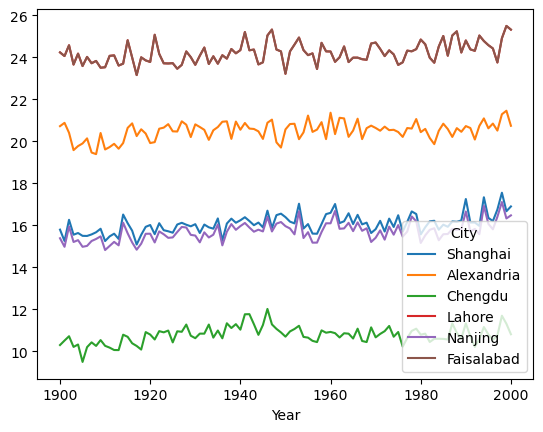

In [191]:
SmallYearTempPivotTable = YearTempPivotTable.loc[1900:2000][SameLati_Shanghai]
SmallYearTempPivotTable.plot()

<AxesSubplot:xlabel='Year'>

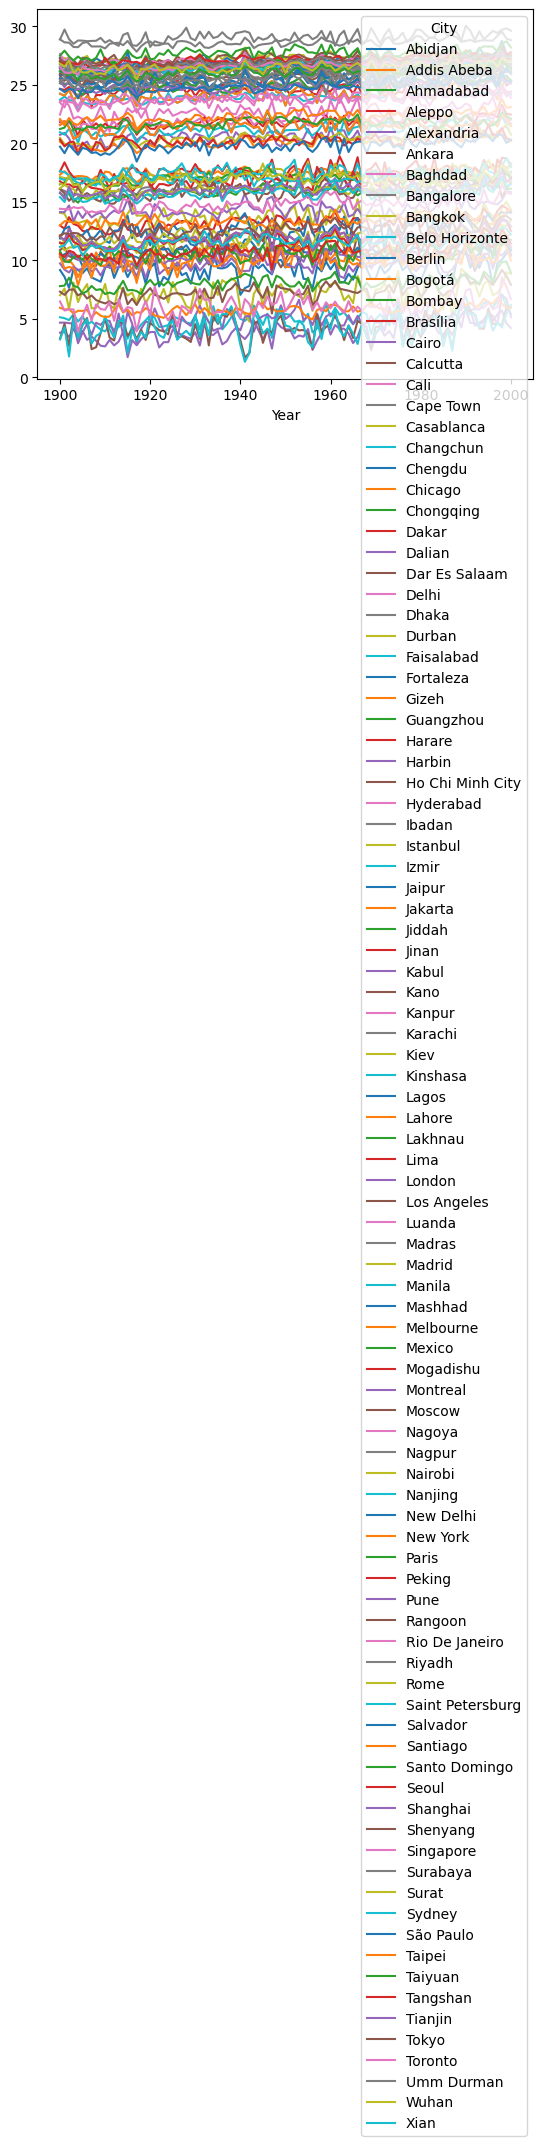

In [192]:
SmallYearTempPivotTable = YearTempPivotTable.loc[1900:2000]
SmallYearTempPivotTable.plot()

<AxesSubplot:xlabel='Year'>

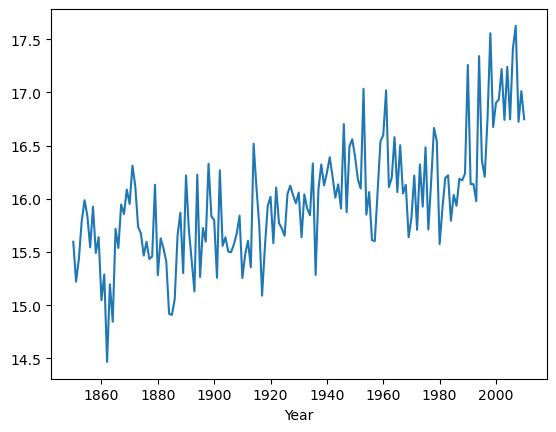

In [198]:
SmallYearTempPivotTable = YearTempPivotTable.loc[1850:2010]["Shanghai"]
SmallYearTempPivotTable.plot()